<b>AUTO TRADING SYSTEM - KERAS LEARNING</b><br>
--
AUTHOR : 
1. HAMORA HADI
2. YEHEZKIEL TATO
3. KHEVIN PANDAPOTAN (NO GITHUB)

In [24]:
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Import data<br>
Sort by date, copy to another assigned variable!

In [26]:
df = pd.read_csv('C:/Users/User/Desktop/Jancok/DataPred.csv')
df.sort_values(by='date',inplace=True)
df_stock = df.copy()

In [28]:
df_stock['date'] = df_stock['date'].astype('str')
df_stock['date'] = pd.to_datetime(df_stock['date'])
df_stock.set_index(df_stock['date'],inplace=True)

df_stock.drop('date',axis=1,inplace=True)

In [30]:
df_stock.head(10)

,time,open,high,low,close,prev,volume,tr_amount,sales_qu,purchase_qu,...,fr_cu_holding,fr_cu_ratio,ad_pr_ratio,in_net_buy,up_do,up_do_ratio,deposit,st_turnover,tr_es_ratio,sign
date,,,,,,,,,,,,,,,,,,,,,
1980-01-04,0,4700,4700,4700,4700,3650,0,0,0,0,...,0,0.0,6.59,0,0,0.0,0,0.0,0.0,32
1980-01-05,0,4700,4700,4700,4700,0,0,0,0,0,...,0,0.0,6.59,0,0,0.0,0,0.0,0.0,32
1980-01-07,0,4990,4990,4990,4990,290,120,0,0,0,...,0,0.0,6.59,0,0,0.0,0,0.0,0.0,32
1980-01-08,0,5290,5290,5290,5290,300,0,0,0,0,...,0,0.0,6.59,0,0,0.0,0,0.0,0.0,32
1980-01-09,0,5700,5740,5700,5700,410,190,0,0,0,...,0,0.0,6.59,0,0,0.0,0,0.0,0.0,32
1980-01-10,0,5700,5700,5700,5700,0,130,0,0,0,...,0,0.0,6.59,0,0,0.0,0,0.0,0.0,32
1980-01-11,0,5640,5640,5640,5640,60,0,0,0,0,...,0,0.0,6.59,0,0,0.0,0,0.0,0.0,32
1980-01-12,0,5600,5600,5600,5600,40,0,0,0,0,...,0,0.0,6.59,0,0,0.0,0,0.0,0.0,32
1980-01-14,0,5510,5510,5380,5380,220,150,0,0,0,...,0,0.0,6.59,0,0,0.0,0,0.0,0.0,32


In [33]:
df.info

<bound method DataFrame.info of            date  time   open   high    low  close  prev   volume    tr_amount  \
10939  19800104     0   4700   4700   4700   4700  3650        0            0   
10938  19800105     0   4700   4700   4700   4700     0        0            0   
10937  19800107     0   4990   4990   4990   4990   290      120            0   
10936  19800108     0   5290   5290   5290   5290   300        0            0   
10935  19800109     0   5700   5740   5700   5700   410      190            0   
...         ...   ...    ...    ...    ...    ...   ...      ...          ...   
4      20200928     0  22100  22500  21500  22000  -100   442765   9716000000   
3      20200929     0  22000  22050  20700  21850  -150   551123  11831000000   
2      20201005     0  22200  24350  21700  24100  2250  1094057  25444000000   
1      20201006     0  24100  24350  23350  23750  -350   463912  10998000000   
0      20201007     0  23500  23550  23100  23500  -250   315924   7378000000

In [34]:
df_stock_default = df_stock[['high','low','open','close','volume']]
df_stock_default.head(10)

,high,low,open,close,volume
date,,,,,
1980-01-04,4700,4700,4700,4700,0
1980-01-05,4700,4700,4700,4700,0
1980-01-07,4990,4990,4990,4990,120
1980-01-08,5290,5290,5290,5290,0
1980-01-09,5740,5700,5700,5700,190
1980-01-10,5700,5700,5700,5700,130
1980-01-11,5640,5640,5640,5640,0
1980-01-12,5600,5600,5600,5600,0
1980-01-14,5510,5380,5510,5380,150


<b>VISUALIZE!</b>

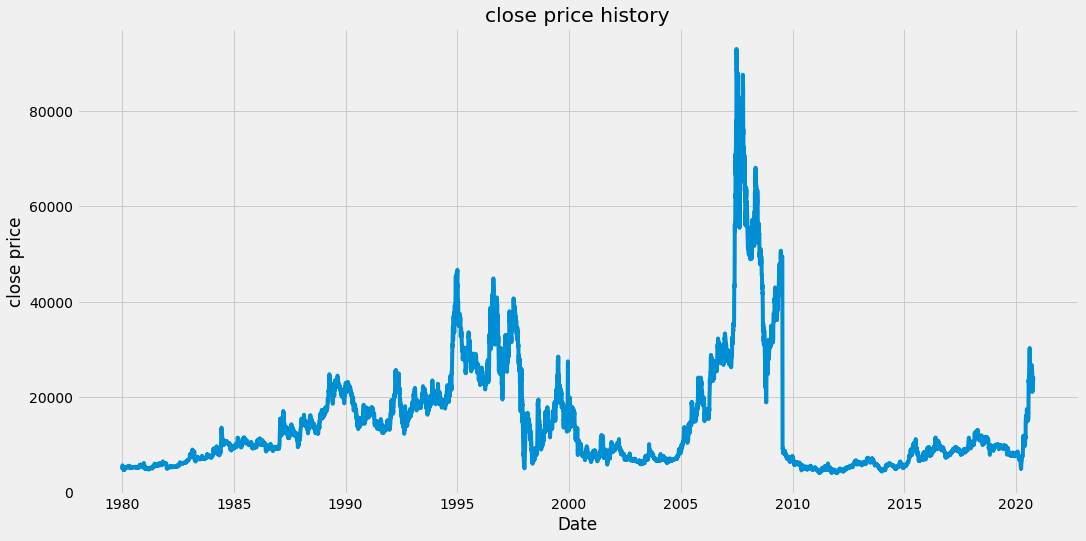

In [35]:
plt.figure(figsize = (16,8))
plt.title('close price history')
plt.plot(df_stock_default['close'])
plt.xlabel('Date')
plt.ylabel('close price')
plt.show()

In [36]:
data = df_stock_default.filter(['close'])
data.head(10)

,close
date,
1980-01-04,4700
1980-01-05,4700
1980-01-07,4990
1980-01-08,5290
1980-01-09,5700
1980-01-10,5700
1980-01-11,5640
1980-01-12,5600
1980-01-14,5380


In [39]:
dataset = data.values
dataset

array([[ 4700],
       [ 4700],
       [ 4990],
       ...,
       [24100],
       [23750],
       [23500]], dtype=int64)

In [41]:
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

8752

In [42]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00708422],
       [0.00708422],
       [0.01034522],
       ...,
       [0.22523333],
       [0.22129765],
       [0.21848645]])

In [45]:
train_data = scaled_data[0:training_data_len,:]
train_data.shape

(8752, 1)

In [70]:
x_train =[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.00708422, 0.00708422, 0.01034522, 0.01371866, 0.01832902,
       0.01832902, 0.01765433, 0.01720454, 0.01473069, 0.01371866,
       0.01326886, 0.01135725, 0.0110199 , 0.01045766, 0.01045766,
       0.01045766, 0.01045766, 0.01034522, 0.01034522, 0.01034522,
       0.00708422, 0.01045766, 0.01158214, 0.01270662, 0.01270662,
       0.01270662, 0.01045766, 0.01045766, 0.01045766, 0.01023277,
       0.00697178, 0.00730912, 0.01068256, 0.01068256, 0.01068256,
       0.01068256, 0.01068256, 0.01068256, 0.01068256, 0.01068256,
       0.01079501, 0.01079501, 0.01079501, 0.01079501, 0.01079501,
       0.01079501, 0.0138311 , 0.01371866, 0.0138311 , 0.0138311 ,
       0.0138311 , 0.0138311 , 0.0138311 , 0.0138311 , 0.0138311 ,
       0.0138311 , 0.01371866, 0.0138311 , 0.0138311 , 0.0138311 ])]
[0.013831103114809402]



In [71]:
x_train,y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(8692, 60, 1)

In [72]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_6 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [73]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [74]:
model.fit(x_train,y_train,batch_size = 1,epochs = 1)

8692/8692 [==============================] - 125s 14ms/step - loss: 6.2117e-04


In [75]:
test_data = scaled_data[training_data_len - 60:,:]
x_test = []
y_test = dataset[training_data_len:,:]

In [76]:
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [77]:
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [78]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions

array([[ 5244.4385],
       [ 5244.853 ],
       [ 5230.97  ],
       ...,
       [23263.484 ],
       [24520.117 ],
       [25139.23  ]], dtype=float32)

In [79]:
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

751.1132794646937

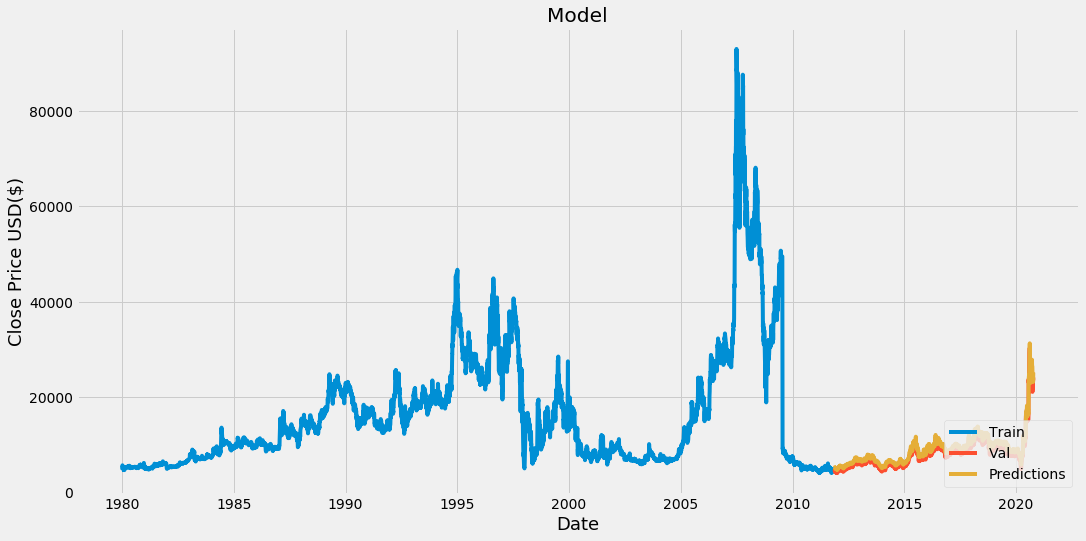

In [80]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize =(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc = 'lower right')
plt.show()

In [82]:
valid.head(10)

,close,Predictions
date,,
2011-11-17,4580,5244.438477
2011-11-18,4540,5244.853027
2011-11-21,4515,5230.970215
2011-11-22,4750,5208.624512
2011-11-23,4540,5311.392090
2011-11-24,4500,5285.218750
2011-11-25,4525,5224.753418
2011-11-28,4415,5198.198730
2011-11-29,4250,5137.381836


In [83]:
df_new = df_stock_default.copy()
df_new.head(10)

,high,low,open,close,volume
date,,,,,
1980-01-04,4700,4700,4700,4700,0
1980-01-05,4700,4700,4700,4700,0
1980-01-07,4990,4990,4990,4990,120
1980-01-08,5290,5290,5290,5290,0
1980-01-09,5740,5700,5700,5700,190
1980-01-10,5700,5700,5700,5700,130
1980-01-11,5640,5640,5640,5640,0
1980-01-12,5600,5600,5600,5600,0
1980-01-14,5510,5380,5510,5380,150


In [91]:
new_df = df_new.filter(['close'])
last_60 = new_df[-60:].values
#Males ajg nulis keterangannya sumpah
last_60_scaled = scaler.transform(last_60)

In [92]:
X_test = []
X_test.append(last_60_scaled)

X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [93]:
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[25138.873]]
